In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
%matplotlib inline

**6. At the end of Section 9.6.1, it is claimed that in the case of data that
is just barely linearly separable, a support vector classifier with a
small value of cost that misclassifies a couple of training observations
may perform better on test data than one with a huge value of cost
that does not misclassify any training observations. You will now
investigate this claim.
(a) Generate two-class data with p = 2 in such a way that the classes
are just barely linearly separable.**

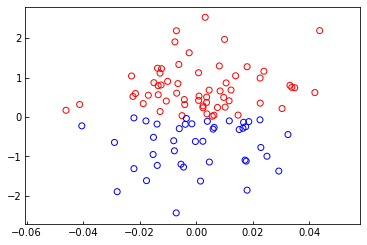

In [2]:
from matplotlib.colors import ListedColormap
color_list =  ['red','blue','green','black','yellow','brown','peru']
cmap = ListedColormap(color_list[:2])
np.random.seed(1)
x1 = np.random.normal(0,0.02,100)
x2 = np.random.normal(0,1,100)
y = ((x1 - x2) > 0) * 1
for idx, cls in enumerate(np.unique(y)):
        plt.scatter(x1[y == cls], x2[y == cls], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

**(b) Compute the cross-validation error rates for support vector
classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how
does this relate to the cross-validation errors obtained?**

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
np.random.seed(1)
X = np.c_[x1,x2]
param_range = [0.001, 0.01, 0.1, 1, 10,100,1000,10000]
svm = SVC(kernel="linear")
param_grid = [
{'C': param_range },
]
grid_search = GridSearchCV(svm , param_grid, cv = 10, scoring='accuracy',return_train_score=True)
grid_search.fit(X ,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [4]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(1 - mean_score, params)

0.41000000000000014 {'C': 0.001}
0.3600000000000001 {'C': 0.01}
0.08999999999999986 {'C': 0.1}
0.010000000000000009 {'C': 1}
0.0 {'C': 10}
0.010000000000000009 {'C': 100}
0.0 {'C': 1000}
0.0 {'C': 10000}


In [5]:
for cost in param_range:
    svm = SVC(kernel="linear", C = cost)
    svm.fit(X ,y)
    print('misclassified num:',(y != svm.predict(X)).sum(),"with C = {}".format(cost))

misclassified num: 41 with C = 0.001
misclassified num: 31 with C = 0.01
misclassified num: 8 with C = 0.1
misclassified num: 1 with C = 1
misclassified num: 0 with C = 10
misclassified num: 0 with C = 100
misclassified num: 0 with C = 1000
misclassified num: 0 with C = 10000


**整体的误分数与较差验证错误率接近一致**

**(c) Generate an appropriate test data set, and compute the test
errors corresponding to each of the values of cost considered.
Which value of cost leads to the fewest test errors, and how
does this compare to the values of cost that yield the fewest
training errors and the fewest cross-validation errors?**

In [6]:
x1_test = np.random.normal(0,10,100)
x2_test =np.random.normal(0,10,100)
y_test = ((x1_test - x2_test) > 0) * 1
X_test = np.c_[x1_test,x2_test]
for cost in param_range:
    svm = SVC(kernel="linear", C = cost)
    svm.fit(X ,y)
    print('misclassified num:',(y_test != svm.predict(X_test)).sum(),"with C = {}".format(cost))

misclassified num: 55 with C = 0.001
misclassified num: 28 with C = 0.01
misclassified num: 27 with C = 0.1
misclassified num: 27 with C = 1
misclassified num: 27 with C = 10
misclassified num: 29 with C = 100
misclassified num: 52 with C = 1000
misclassified num: 52 with C = 10000


COST = 0.1时对应测试误差最小，与训练集COST = 1000比更小

**(d) Discuss your results.**

训练集一般COST越大（接近最大间隔分类器）错误率越少，但对于实际模型（测试集）易过拟合